# Visualize the patches 

fold train repartition
fold_1 46.400000000000006
fold_2 51.92307692307693
fold_3 51.4018691588785
fold test repartition
fold_1 46.400000000000006
fold_2 51.92307692307693
fold_3 51.4018691588785


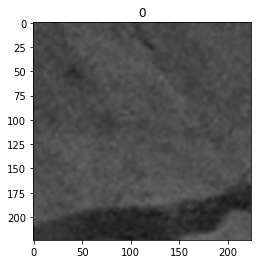

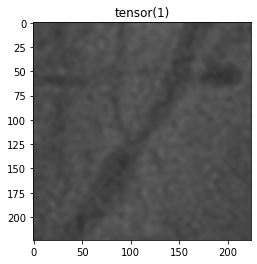

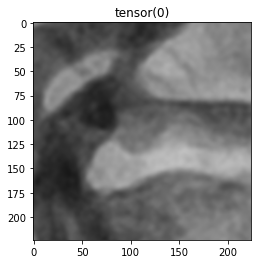

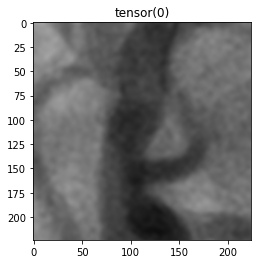

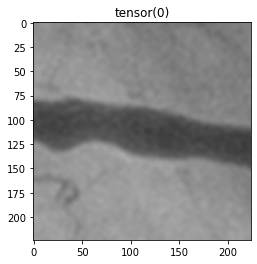

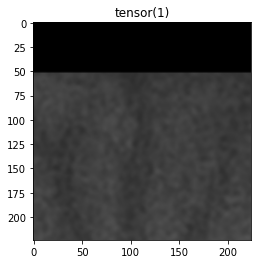

torch.Size([5, 3, 224, 224])


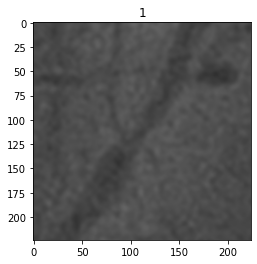

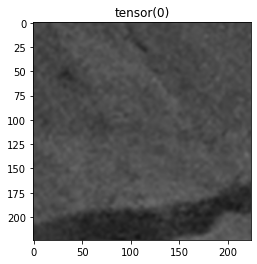

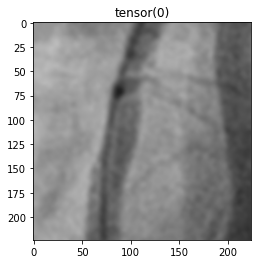

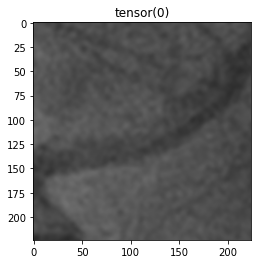

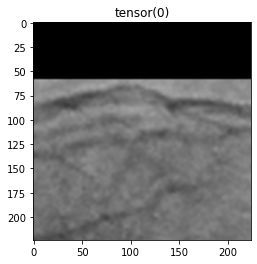

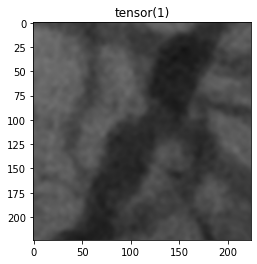

torch.Size([5, 3, 224, 224])


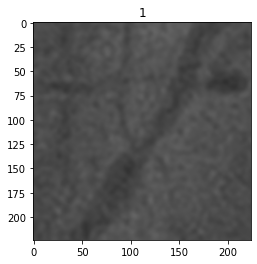

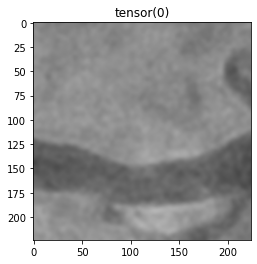

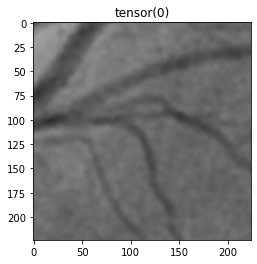

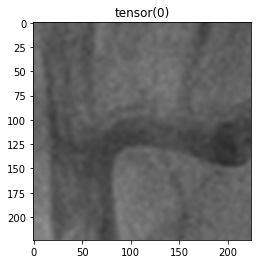

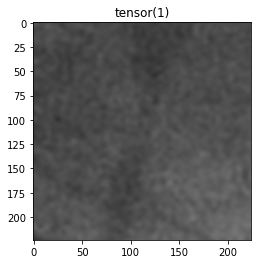

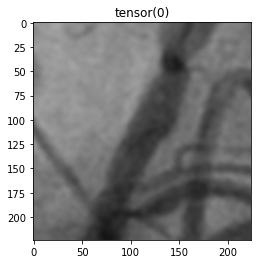

torch.Size([5, 3, 224, 224])


In [5]:
# Verify that the label are correct :
from dataset import CardioDataset, k_fold , cv_iterate
import torchvision.transforms as T
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

num_fold = 3 
data_dir = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code/Data_CVD/data_CNN_stenosis'
annotated_file = os.path.join(data_dir , 'annotated_box')
results_save = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code/cnn/results/stenosis'
seed = 42
folds_train, folds_test, folds_test_label, folds_train_label = k_fold(num_fold,annotated_file,results_save,seed)
    
for k in range(num_fold):

    split_data, samplers = cv_iterate(k,folds_train, folds_test, folds_train_label)

    transform_stenosis = T.Compose([T.RandomCrop(size=(224,224))])
        # Create training and validation datasets
        
        # Create training and validation dataloaders
    image_datasets_train = {'train': CardioDataset(data_dir,annotations_file = split_data['train'],
                                transform =None,to_tensor=True,norm=False,norm_imgnet = True, transform_stenosis = transform_stenosis ) ,
                            'val': CardioDataset(data_dir,annotations_file = split_data['val'],
                                transform =None,to_tensor=True,norm=False,norm_imgnet = True, transform_stenosis = T.Compose([T.CenterCrop(size=224)]) )}
    dataloaders_dict = {x: DataLoader(image_datasets_train[x], batch_size= 5 ) for x in ['train', 'val']}

    img,lab = image_datasets_train['train'][0]
    
    plt.figure()
    plt.imshow(img.permute(1, 2, 0))
    plt.title(lab)
    plt.show()

    image,label = next(iter(dataloaders_dict['val']))

    fig, axs = plt.subplots(5)
    for i, (img,lab)  in enumerate(zip(image,label)) : 
        axs[i].imshow(img.permute(1, 2, 0))
        plt.title(lab)
        plt.show()

    print(image.size())

fold train repartition
fold_1 12.162162162162163
fold_2 12.272727272727273
fold_3 11.946902654867257
fold test repartition
fold_1 12.162162162162163
fold_2 12.272727272727273
fold_3 11.946902654867257
torch.Size([2, 224, 224])
tensor(0.3466)
tensor(0.1270)


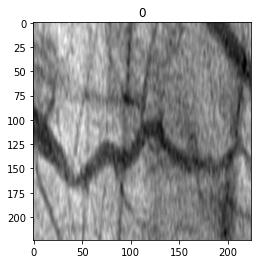

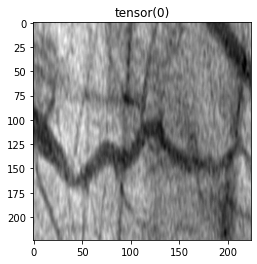

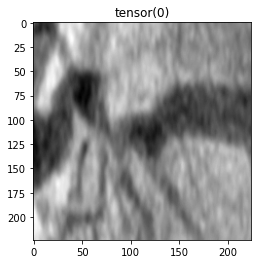

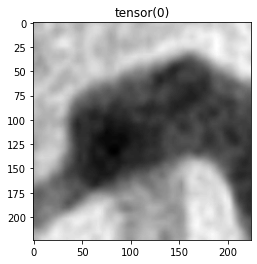

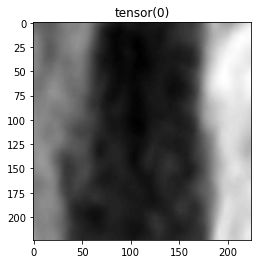

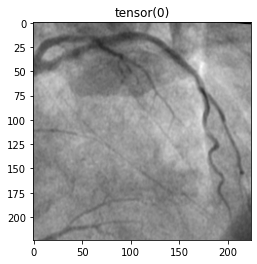

torch.Size([5, 2, 224, 224])


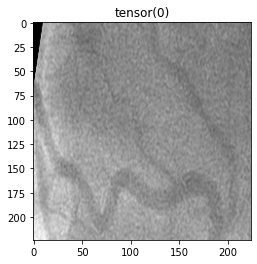

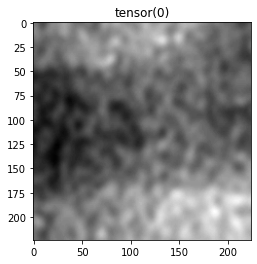

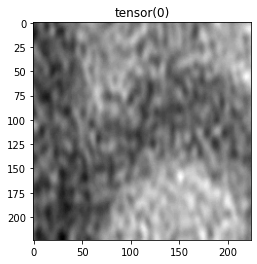

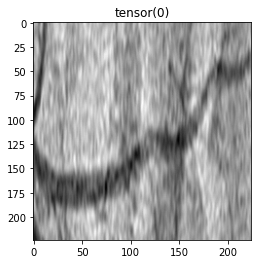

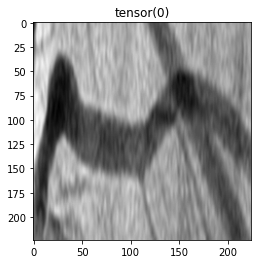

torch.Size([5, 2, 224, 224])
torch.Size([2, 224, 224])
tensor(0.2211)
tensor(0.1701)


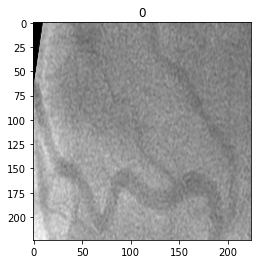

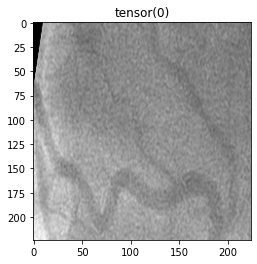

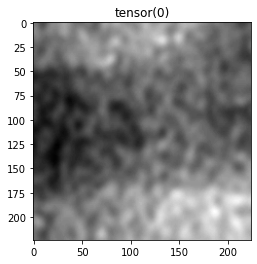

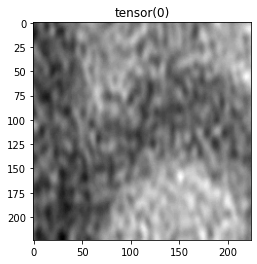

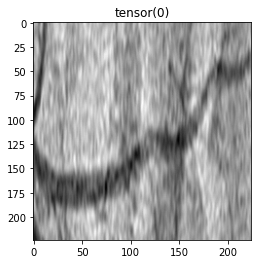

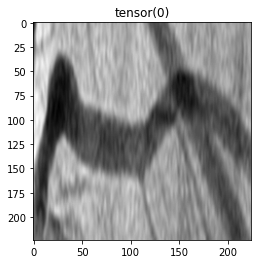

torch.Size([5, 2, 224, 224])


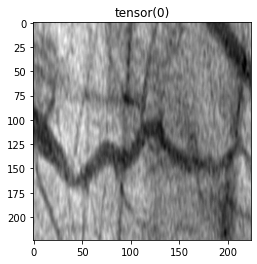

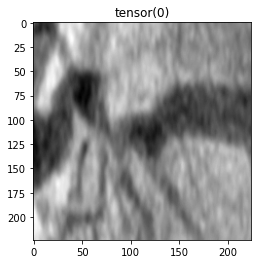

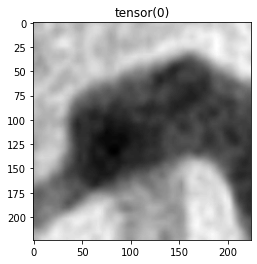

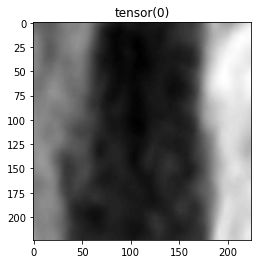

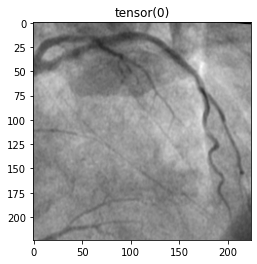

torch.Size([5, 2, 224, 224])
torch.Size([2, 224, 224])
tensor(0.2211)
tensor(0.1701)


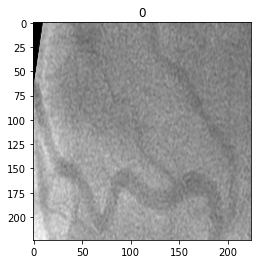

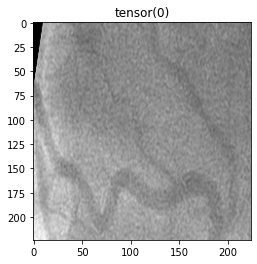

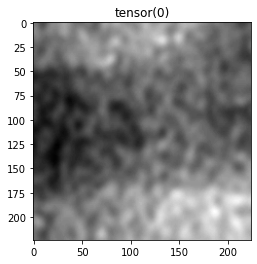

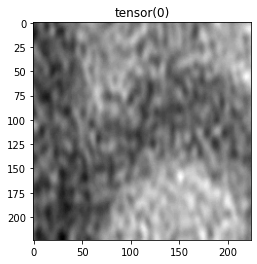

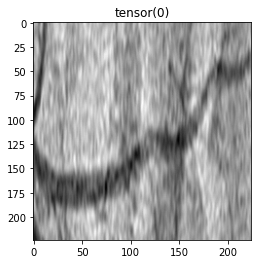

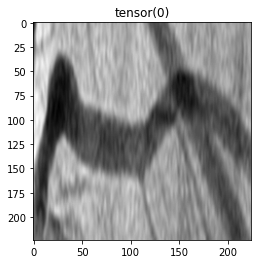

torch.Size([5, 2, 224, 224])


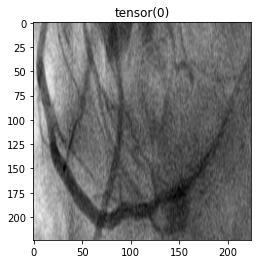

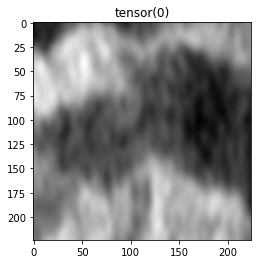

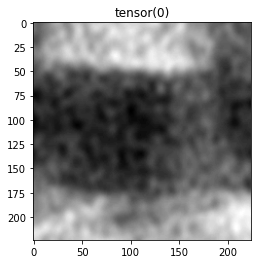

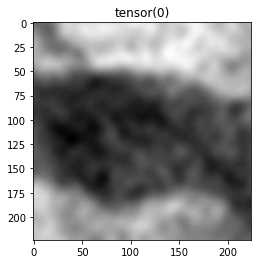

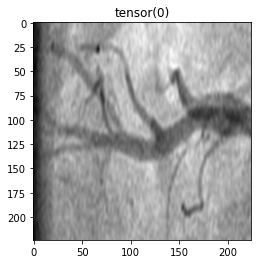

torch.Size([5, 2, 224, 224])


In [14]:
# Verify that the label are correct :
from dataset import CardioDataset, k_fold , cv_iterate
import torchvision.transforms as T
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

num_fold = 3 
data_dir = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code/Data_CVD/data_CNN'
annotated_file = os.path.join(data_dir , 'annotated_box_MI')
results_save = '/Volumes/cardio-project/cardio/SPUM/CVD_detection_code/cnn/results/resnet18'
seed = 42
folds_train, folds_test, folds_test_label, folds_train_label = k_fold(num_fold,annotated_file,results_save,seed)
    
for k in range(num_fold):

    split_data, samplers = cv_iterate(k,folds_train, folds_test, folds_train_label)

    # Create training and validation datasets
    transform = T.Compose([T.RandomHorizontalFlip(0.5) , T.RandomVerticalFlip(0.5), T.RandomAdjustSharpness(sharpness_factor=2,p=0.5)])

    # Create training and validation dataloaders
    image_datasets_train = {'train': CardioDataset(data_dir,annotations_file = split_data['train'],
                                transform =transform,to_tensor=True,norm=True,norm_imgnet = False, transform_stenosis = None ) ,
                            'val': CardioDataset(data_dir,annotations_file = split_data['val'],
                                transform =None,to_tensor=True,norm=True,norm_imgnet = False, transform_stenosis = None)}
    dataloaders_dict = {x: DataLoader(image_datasets_train[x], batch_size= 5 ) for x in ['train', 'val']}

    img,lab = image_datasets_train['train'][0]
    print(img.shape)
    print(img[0].max())
    print(img[1].max())
    plt.figure()
    plt.imshow(img[0],cmap = 'gray')
    plt.imshow(img[1],cmap = 'gray')
    plt.title(lab)
    plt.show()

    image,label = next(iter(dataloaders_dict['train']))

    for img,lab in zip(image,label) : 
        plt.figure()
        plt.imshow(img[0],cmap = 'gray')
        plt.imshow(img[1],cmap = 'gray')
        plt.title(lab)
        plt.show()

    print(image.size())

    image,label = next(iter(dataloaders_dict['val']))

    for img,lab in zip(image,label) : 
        plt.figure()
        plt.imshow(img[0],cmap = 'gray')
        plt.imshow(img[1],cmap = 'gray')
        plt.title(lab)
        plt.show()

    print(image.size())